In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 6 years RIL data Cleaned.xlsx to 6 years RIL data Cleaned.xlsx


In [ ]:
df=pd.read_excel('6 years RIL data Cleaned.xlsx')

In [ ]:
df.head()

,Unnamed: 0,index,Date,Open Price,High Price,Low Price,Close Price
0,0,1482,2015-09-23,840.00,856.75,840.00,851.40
1,1,1481,2015-09-24,848.00,848.00,835.05,837.90
2,2,1480,2015-09-28,837.90,840.90,830.00,834.35
3,3,1479,2015-09-29,829.00,849.30,826.55,839.15
4,4,1478,2015-09-30,848.05,863.00,838.60,860.50


In [ ]:
df.tail()

,Unnamed: 0,index,Date,Open Price,High Price,Low Price,Close Price
1478,1478,4,2021-09-16,2379.0,2436.00,2367.00,2428.10
1479,1479,3,2021-09-17,2445.0,2455.80,2378.80,2390.40
1480,1480,2,2021-09-20,2375.0,2418.00,2370.00,2393.90
1481,1481,1,2021-09-21,2411.0,2416.00,2384.65,2404.15
1482,1482,0,2021-09-22,2409.0,2441.25,2398.15,2430.60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   1483 non-null   int64         
 1   index        1483 non-null   int64         
 2   Date         1483 non-null   datetime64[ns]
 3   Open Price   1483 non-null   float64       
 4   High Price   1483 non-null   float64       
 5   Low Price    1483 non-null   float64       
 6   Close Price  1483 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 81.2 KB


In [ ]:
df = df[['Date', 'Open Price', 'High Price', 'Low Price', 'Close Price']]

In [ ]:
df.head()

,Date,Open Price,High Price,Low Price,Close Price
0,2015-09-23,840.00,856.75,840.00,851.40
1,2015-09-24,848.00,848.00,835.05,837.90
2,2015-09-28,837.90,840.90,830.00,834.35
3,2015-09-29,829.00,849.30,826.55,839.15
4,2015-09-30,848.05,863.00,838.60,860.50


In [ ]:
df = df.reset_index()

In [ ]:
df.head()

,index,Date,Open Price,High Price,Low Price,Close Price
0,0,2015-09-23,840.00,856.75,840.00,851.40
1,1,2015-09-24,848.00,848.00,835.05,837.90
2,2,2015-09-28,837.90,840.90,830.00,834.35
3,3,2015-09-29,829.00,849.30,826.55,839.15
4,4,2015-09-30,848.05,863.00,838.60,860.50


In [ ]:
df.drop(['index'], axis = 1)

,Date,Open Price,High Price,Low Price,Close Price
0,2015-09-23,840.00,856.75,840.00,851.40
1,2015-09-24,848.00,848.00,835.05,837.90
2,2015-09-28,837.90,840.90,830.00,834.35
3,2015-09-29,829.00,849.30,826.55,839.15
4,2015-09-30,848.05,863.00,838.60,860.50
...,...,...,...,...,...
1478,2021-09-16,2379.00,2436.00,2367.00,2428.10
1479,2021-09-17,2445.00,2455.80,2378.80,2390.40
1480,2021-09-20,2375.00,2418.00,2370.00,2393.90
1481,2021-09-21,2411.00,2416.00,2384.65,2404.15


In [ ]:
df.to_csv('6 years RIL data Cleaned.csv')

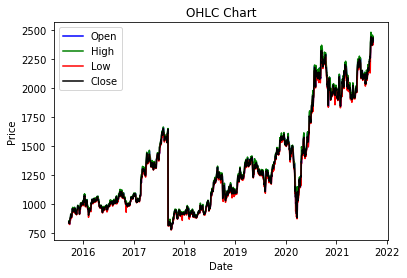

In [ ]:
plt.plot(df.Date, df['Open Price'], color='b', label= 'Open')
plt.plot(df.Date, df['High Price'], color='g', label= 'High')
plt.plot(df.Date, df['Low Price'], color='r', label= 'Low')
plt.plot(df.Date, df['Close Price'], color='k', label= 'Close')

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("OHLC Chart")

plt.legend()

plt.show()

In [ ]:
dfC = df.reset_index()['Close Price']

In [ ]:
dfC=pd.DataFrame(dfC).to_numpy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
dfC = scaler.fit_transform(np.array(dfC).reshape(-1,1))


A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

In [ ]:
dfC

array([[ 851.4 ],
       [ 837.9 ],
       [ 834.35],
       ...,
       [2393.9 ],
       [2404.15],
       [2430.6 ]])

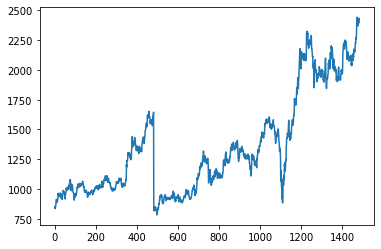

In [ ]:
plt.plot(dfC)

Train : test == 65:35

In [ ]:
train_size = int(len(dfC)*0.65)
test_size = len(dfC) - train_size
train_df, test_df = dfC[0:train_size, :], dfC[train_size : len(dfC), : 1]

Taking 60 days into account and predicting the 61st day price

In [ ]:
def create_dataset(dataset, timestamp=1):
    dataX, datay = [], []
    for i in range(len(dataset)-timestamp-1):
        a = dataset[i:(i+timestamp),0]
        dataX.append(a)
        datay.append(dataset[i+timestamp, 0])
    return np.array(dataX), np.array(datay)

In [ ]:
timestamp = 60
X_train, y_train = create_dataset(train_df, timestamp)
X_test, y_test = create_dataset(test_df, timestamp)

In [ ]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(902, 60) (902,)
(459, 60) (459,)


Reshape the Train dataset

It's Algo Time
CATBoost


In [ ]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 29 kB/s 


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
model=CatBoostRegressor(iterations=1000,learning_rate=0.05,loss_function='RMSE', logging_level='Silent')

In [ ]:
model.fit(X_train,y_train)

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [ ]:
math.sqrt(mean_squared_error(y_train, train_pred))

4.352005147830401

In [ ]:
math.sqrt(mean_squared_error(y_test, test_pred))

899.8609765400919

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model_AB=AdaBoostRegressor()

In [ ]:
model_AB.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [ ]:
train_pred = model_AB.predict(X_train)
test_pred = model_AB.predict(X_test)

In [ ]:
math.sqrt(mean_squared_error(y_train, train_pred))

20.815772794014077

In [ ]:
math.sqrt(mean_squared_error(y_test, test_pred))

1011.763719936654

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model_XG=XGBRegressor()
model_XG.fit(X_train,y_train)

[17:55:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
train_pred = model_XG.predict(X_train)
test_pred = model_XG.predict(X_test)

In [ ]:
train_pred.shape

(902,)

In [ ]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

ValueError: ignored

In [ ]:
math.sqrt(mean_squared_error(y_train, train_pred))

11.855675670599092

In [ ]:
math.sqrt(mean_squared_error(y_test, test_pred))

970.838218011584

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
model_LGBM=LGBMRegressor()

In [ ]:
model_LGBM.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
train_pred = model_LGBM.predict(X_train)
test_pred = model_LGBM.predict(X_test)

In [ ]:
math.sqrt(mean_squared_error(y_train, train_pred))

15.6896559235953

In [ ]:
math.sqrt(mean_squared_error(y_test, test_pred))

521.6411437699795